# Notebook description

This notebook looks at Poisson and uniform spiking statistics. Specifically, we show that:
 - Sampling randomly from a Poisson process produces a Poisson process; conversely, combining Poisson processes produces a Poisson process
 - Combining uniform processes with random shifts produces an approximately Poisson process; conversely, randomly sampling from a uniform process produces an approximately Poisson process. 

Poisson point process can be thought of as the central limit case of the combination of independent, identical distributed point processes. 

In [1]:
%pylab inline
import numpy as np
from numpy.random import exponential, rand, randint

Populating the interactive namespace from numpy and matplotlib


# Basic spike train statistics

First let's look at a uniform spike process vs a Poisson spike process. A defining feature of the Poisson spike process is that the time intervals between spikes (i.e., the interspike intervals (ISIs)) are exponentially distributed.

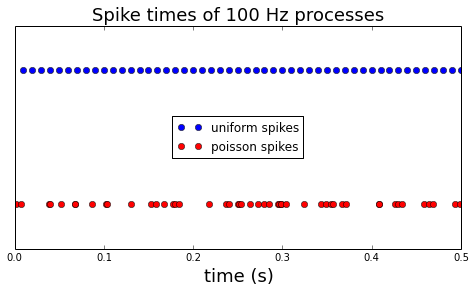

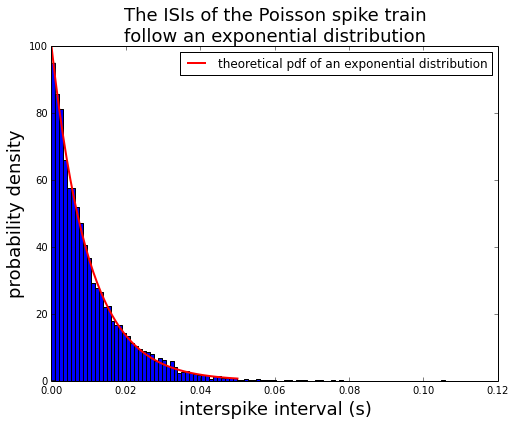

In [2]:
# what do Poisson spikes look like
n_isi = 100
rate = 100.
isi_uniform = np.ones(n_isi)/rate
isi_poisson = exponential(1./rate, (n_isi))

spk_times_uniform = np.cumsum(isi_uniform)
spk_times_poisson = np.cumsum(isi_poisson)

figure(figsize=(8,4))
ax = subplot(111)
plot(spk_times_uniform, .8*np.ones(n_isi), 'bo', label='uniform spikes')
plot(spk_times_poisson, .2*np.ones(n_isi), 'ro', label='poisson spikes')
xlim(0, n_isi/(rate*2))
xlabel('time (s)', fontsize=18)
ax.set_yticks([]); ax.set_yticklabels([]); ylim(0, 1)
legend(loc='center')
title('Spike times of %.0f Hz processes' % rate, fontsize=18)

# gather some statistics
n_isi = 10000
isi_poisson = exponential(1./rate, (n_isi))

# theoretical distribution
x = np.linspace(0, 5./rate)
exp_th = rate*np.exp(-rate*x)

figure(figsize=(8,6))
hist(isi_poisson, bins=100, normed=True)
plot(x, exp_th, 'r', linewidth=2, label='theoretical pdf of an exponential distribution')
xlabel('interspike interval (s)', fontsize=18)
ylabel('probability density', fontsize=18)
legend(loc='upper right')
title('The ISIs of the Poisson spike train\n' +
      'follow an exponential distribution', fontsize=18);

# Sampling from an input spike train produces a Poisson spike train

In our system, we interpret connection weights between neuron populations as a probability distribution.

First, we show that if the input spikes are Poisson, the output spikes will for sure be Poisson. This goes in the other direction too. If we combine Poisson spike streams into a single spike stream, that spike stream will also be Poisson.

Next, what if the spike trains we combine (or split) are not Poisson? Will the combined (or split) spike trains be Poisson? We show that combining uniform spike trains with random phases approximates a Poisson process as the number of combined spike trains grows. We show that if we split a uniform spike train into multiple output spike trains probabilistically, the output spike trains will be approximately Poisson as the number of outputs increases.

### Splitting and combining Poisson spike trains produce Poisson spike trains

Here we split an input Poisson spike train into two output Poisson spike trains. Each spike has a .5 chance of being assigned to either output.

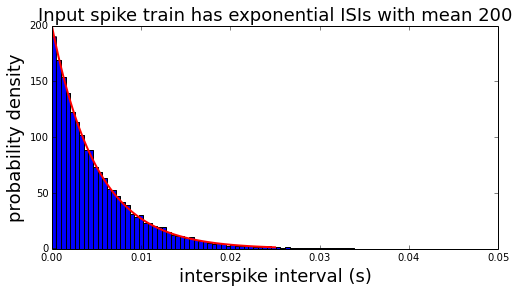

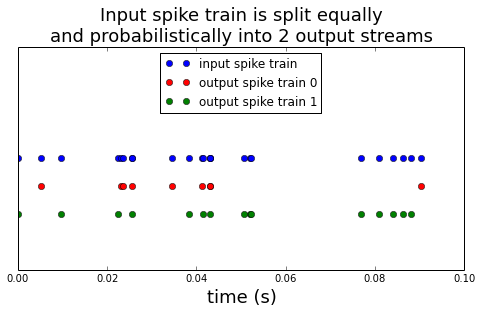

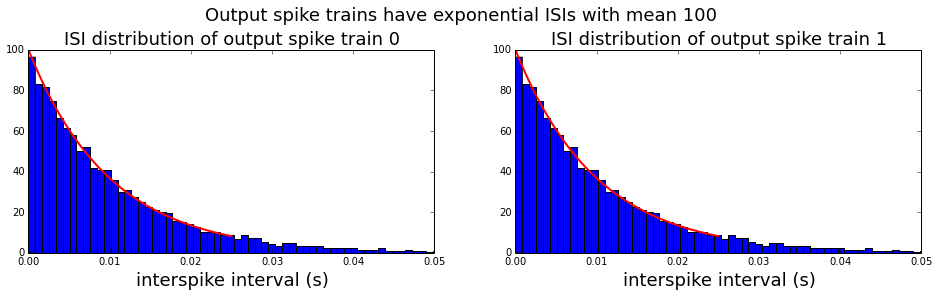

In [3]:
n_targets = 2
rate_per_target = 100.
rate = rate_per_target * n_targets
n_spikes = 100. * n_targets * rate_per_target

isi_in = exponential(1./rate, n_spikes)
spike_times_in = np.cumsum(isi_in)

r = rand(n_spikes)
idx_0 = r<=.5
idx_1 = r>.5
spike_times_out_0 = spike_times_in[idx_0]
spike_times_out_1 = spike_times_in[idx_1]

isi_out_0 = np.diff(spike_times_out_0)
isi_out_1 = np.diff(spike_times_out_1)

x = np.linspace(0, 5./rate, 100)
isi_in_th = rate*np.exp(-rate*x)

figure(figsize=(8,4))
hist(isi_in, bins=100, normed=True)
plot(x, isi_in_th, 'r', linewidth=2)
xlim(0, 5./rate_per_target)
xlabel('interspike interval (s)', fontsize=18)
ylabel('probability density', fontsize=18)
title('Input spike train has exponential ISIs with mean %.0f' % rate, fontsize=18);

figure(figsize=(8,4))
ax = subplot(111)
plot(spike_times_in[:50], .6*np.ones(50), 'bo', label='input spike train')
plot(spike_times_out_0[:25], .5*np.ones(25), 'ro', label='output spike train 0')
plot(spike_times_out_1[:25], .4*np.ones(25), 'go', label='output spike train 1')
xlim(0,20./rate)
ax.set_yticks([]); ax.set_yticklabels([]); ylim(.2, 1)
legend(loc='upper center')
xlabel('time (s)', fontsize=18)
title('Input spike train is split equally\nand probabilistically into 2 output streams', fontsize=18)

x = np.linspace(0, 5./rate, 100)
isi_out_th = rate_per_target*np.exp(-rate_per_target*x)

figure(figsize=(16,4))
subplot(121)
hist(isi_out_0, bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./rate_per_target)
xlabel('interspike interval (s)', fontsize=18)
title('ISI distribution of output spike train 0', fontsize=18)
subplot(122)
hist(isi_out_0, bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./rate_per_target)
xlabel('interspike interval (s)', fontsize=18)
title('ISI distribution of output spike train 1', fontsize=18)
suptitle('Output spike trains have exponential ISIs with mean %d' % rate_per_target, fontsize=18);
subplots_adjust(top=.83)

### Combining uniform spike trains produces an approximately Poisson spike train as the number of combined spike trains increases

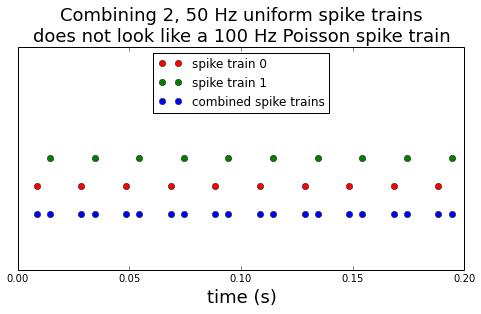

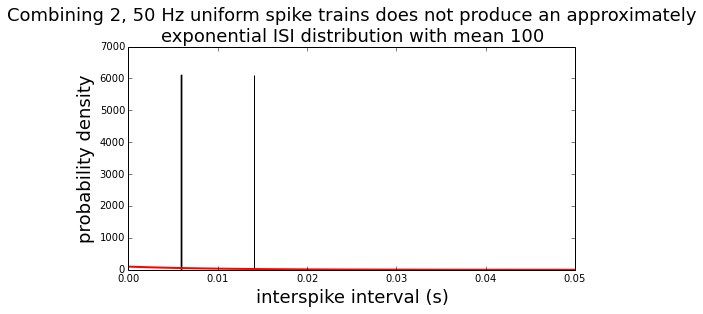

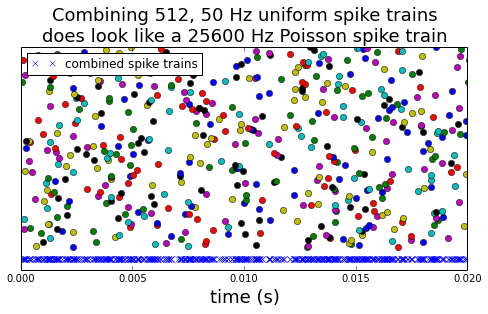

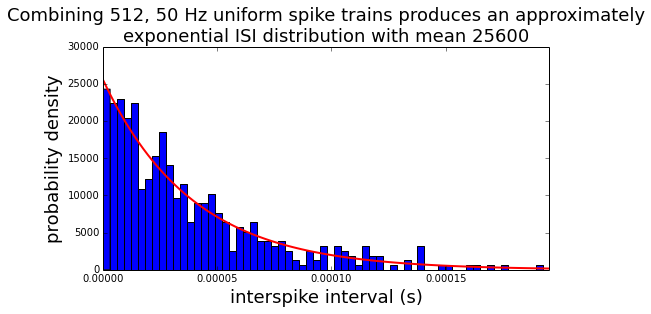

In [6]:
n_inputs = 2
rate_per_input = 50.
spikes_per_input = 1000
output_rate = rate_per_input * n_inputs

input_spike_times = np.array([(np.arange(spikes_per_input)+ rand())/rate_per_input 
                             for i in xrange(n_inputs)])

output_spike_times = sort(input_spike_times.flatten())
isi_out = np.diff(output_spike_times)

figure(figsize=(8,4))
ax = subplot(111)
plot(input_spike_times[0,:25], .5*np.ones(25), 'ro', label='spike train 0')
plot(input_spike_times[1,:25], .6*np.ones(25), 'go', label='spike train 1')
plot(output_spike_times[:50], .4*np.ones(50), 'bo', label='combined spike trains')
xlim(0,20./output_rate)
ax.set_yticks([]); ax.set_yticklabels([]); ylim(.2, 1)
legend(loc='upper center')
xlabel('time (s)', fontsize=18)
title('Combining %d, %.0f Hz uniform spike trains\ndoes not look like a %.0f Hz Poisson spike train' % 
      (n_inputs, rate_per_input, output_rate), fontsize=18)

x = np.linspace(0, 5./output_rate, 100)
isi_out_th = output_rate*np.exp(-output_rate*x)

figure(figsize=(8,4))
hist(isi_out, bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./output_rate)
xlabel('interspike interval (s)', fontsize=18)
ylabel('probability density', fontsize=18)
title('Combining %d, %.0f Hz uniform spike trains does not produce an approximately\n' % (n_inputs, rate_per_input) +
      'exponential ISI distribution with mean %.0f' % output_rate, fontsize=18);
##########################################
n_inputs = 512
rate_per_input = 50.
spikes_per_input = 1000
output_rate = rate_per_input * n_inputs

input_spike_times = np.array([(np.arange(spikes_per_input)+ rand())/rate_per_input 
                             for i in xrange(n_inputs)])

output_spike_times = sort(input_spike_times.flatten())
isi_out = np.diff(output_spike_times)

figure(figsize=(8,4))
ax = subplot(111)
y_pos = np.linspace(0.1, 1, n_inputs)
for i in xrange(n_inputs):
    plot(input_spike_times[i,:25], y_pos[i]*np.ones(25), 'o')
plot(output_spike_times[:25*n_inputs], .05*np.ones(25*n_inputs), 'bx', label='combined spike trains')
xlim(0,1./rate_per_input)
ax.set_yticks([]); ax.set_yticklabels([]); ylim(0, 1)
legend(loc='upper left')
xlabel('time (s)', fontsize=18)
title('Combining %d, %.0f Hz uniform spike trains\ndoes look like a %.0f Hz Poisson spike train' % 
      (n_inputs, rate_per_input, output_rate), fontsize=18)

x = np.linspace(0, 5./output_rate, 100)
isi_out_th = output_rate*np.exp(-output_rate*x)

figure(figsize=(8,4))
hist(isi_out, bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./output_rate)
xlabel('interspike interval (s)', fontsize=18)
ylabel('probability density', fontsize=18)
title('Combining %d, %.0f Hz uniform spike trains produces an approximately\n' % (n_inputs, rate_per_input) +
      'exponential ISI distribution with mean %.0f' % output_rate, fontsize=18);

### Spliting a uniform spike train produces approximately Poisson spike trains

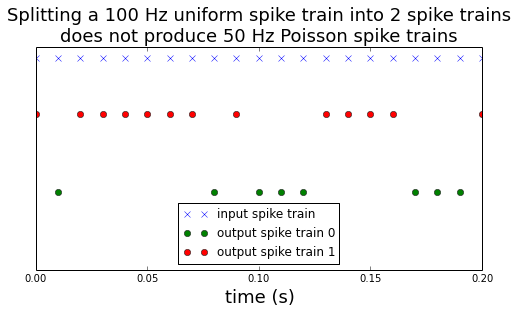

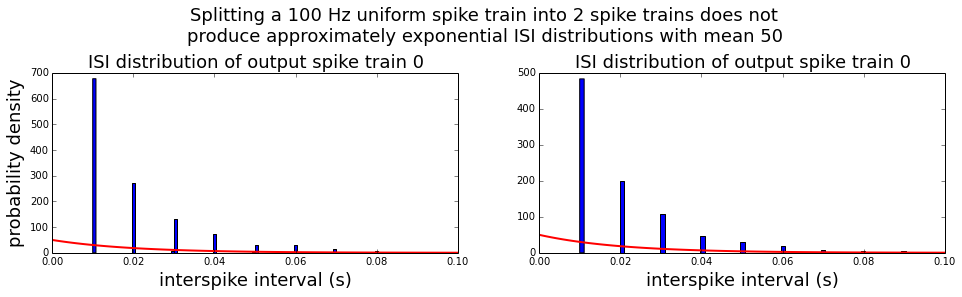

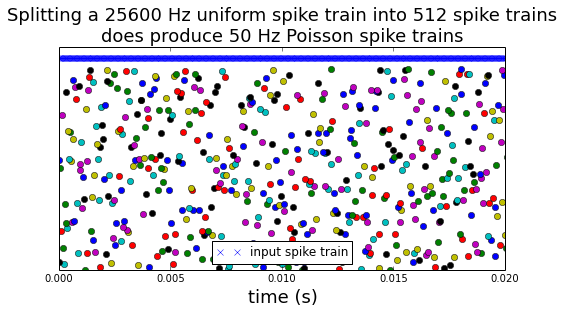

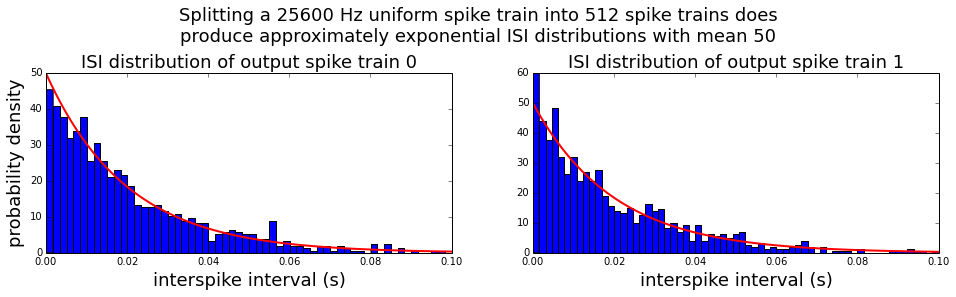

In [8]:
n_outputs = 2
rate_per_output = 50.
input_rate = n_outputs * rate_per_output
n_input_spikes = 20.*input_rate

input_spike_times = np.arange(n_input_spikes)/input_rate 
targets = randint(0, n_outputs, n_input_spikes)

output_spike_times = [input_spike_times[targets==i] for i in xrange(n_outputs)]
isi_outs = [np.diff(output_spike_times[i]) for i in xrange(n_outputs)]

y_offsets = linspace(.35, .7, n_outputs)
figure(figsize=(8,4))
ax = subplot(111)
plot(input_spike_times[:input_rate], .95*np.ones(input_rate), 'x', label='input spike train')
for i in xrange(n_outputs):
    plot(output_spike_times[i][:rate_per_output], y_offsets[i]*np.ones(rate_per_output), 'o', 
         label='output spike train %d' % i)
xlim(0,20./input_rate)
ax.set_yticks([]); ax.set_yticklabels([]); ylim(0, 1)
legend(loc='lower center')
xlabel('time (s)', fontsize=18)
title('Splitting a %.0f Hz uniform spike train into %d spike trains\ndoes not produce %.0f Hz Poisson spike trains' % 
      (input_rate, n_outputs, rate_per_output), fontsize=18)

x = np.linspace(0, 5./rate_per_output, 100)
isi_out_th = rate_per_output*np.exp(-rate_per_output*x)

figure(figsize=(16,4))
subplot(121)
hist(isi_outs[0], bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./rate_per_output)
xlabel('interspike interval (s)', fontsize=18)
ylabel('probability density', fontsize=18)
title('ISI distribution of output spike train 0', fontsize=18)
subplot(122)
hist(isi_outs[1], bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./rate_per_output)
xlabel('interspike interval (s)', fontsize=18)
title('ISI distribution of output spike train 0', fontsize=18)
suptitle('Splitting a %.0f Hz uniform spike train into %d spike trains does not\n' % (input_rate, n_outputs) +
      'produce approximately exponential ISI distributions with mean %.0f' % (rate_per_output), fontsize=18);
subplots_adjust(top=.75)

############################################

n_outputs = 512
rate_per_output = 50.
input_rate = n_outputs * rate_per_output
n_input_spikes = 20.*input_rate

input_spike_times = np.arange(n_input_spikes)/input_rate 
targets = randint(0, n_outputs, n_input_spikes)

output_spike_times = [input_spike_times[targets==i] for i in xrange(n_outputs)]
isi_outs = [np.diff(output_spike_times[i]) for i in xrange(n_outputs)]

y_offsets = linspace(0, .9, n_outputs)
figure(figsize=(8,4))
ax = subplot(111)
plot(input_spike_times[:input_rate], .95*np.ones(input_rate), 'x', label='input spike train')
for i in xrange(n_outputs):
    plot(output_spike_times[i][:rate_per_output], y_offsets[i]*np.ones(rate_per_output), 'o')
xlim(0,1./rate_per_output)
ax.set_yticks([]); ax.set_yticklabels([]); ylim(0, 1)
legend(loc='lower center')
xlabel('time (s)', fontsize=18)
title('Splitting a %.0f Hz uniform spike train into %d spike trains\ndoes produce %.0f Hz Poisson spike trains' % 
      (input_rate, n_outputs, rate_per_output), fontsize=18)

x = np.linspace(0, 5./rate_per_output, 100)
isi_out_th = rate_per_output*np.exp(-rate_per_output*x)

figure(figsize=(16,4))
subplot(121)
hist(isi_outs[0], bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./rate_per_output)
xlabel('interspike interval (s)', fontsize=18)
ylabel('probability density', fontsize=18)
title('ISI distribution of output spike train 0', fontsize=18)
subplot(122)
hist(isi_outs[1], bins=100, normed=True)
plot(x, isi_out_th, 'r', linewidth=2)
xlim(0, 5./rate_per_output)
xlabel('interspike interval (s)', fontsize=18)
title('ISI distribution of output spike train 1', fontsize=18)
suptitle('Splitting a %.0f Hz uniform spike train into %d spike trains does\n' % (input_rate, n_outputs) +
      'produce approximately exponential ISI distributions with mean %.0f' % (rate_per_output), fontsize=18);
subplots_adjust(top=.75)